# 10.5 AVERAGE OVER MANY DRAWS

Use this notebook to store your work for this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rand = default_rng().random

# 150 simulations, Lin = 0, from 0min - 300 min

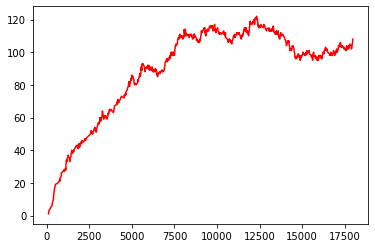

In [47]:
# Gillespie algorithm

lini = 0
beta_birth = 1.5/60
k_death = 0.014/60

#Number of steps
N =1000

l = lini
T = 0

Ts = np.zeros(N)
Ls = np.zeros(N)

for n in range(N):
    rate = beta_birth + k_death * l
    t = - 1/rate * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    if event:
        l = l+1
    else:
        l = l-1
    T = T+t
    
    Ts[n] = T
    Ls[n] = l
    
plt.plot(Ts[Ts <= 18000], Ls[Ts <= 18000], 'r-');

In [4]:
Simulations = 150

lini = 0
beta_birth = 1.5/60
k_death = 0.014/60

N =1000

for i in range(Simulations):
    l = lini
    T = 0

    TS = np.zeros(N)
    LS = np.zeros(N)

    for n in range(N):
        rate = beta_birth + k_death * l
        t = - 1/rate * np.log(rand())
        xi = beta_birth / rate
        event = rand() < xi
        if event:
            l = l+1
        else:
            l = l-1
        T = T+t

        TS[n] = T
        LS[n] = l
    
    Ts += TS
    Ls += LS
    
Ts = Ts/Simulations
Ls = Ls/Simulations



## Final Work

In [57]:
Simulations = 150

lini = 0
beta_birth = 1.5/60
k_death = 0.014/60

N =1000

CumalativePopulation = np.zeros(301)
Minutes = np.arange(0,18060,60)

Ts = np.zeros(N)
Ls = np.zeros(N)

for i in range(Simulations):
    l = lini
    T = 0
    Count = 0

    TS = np.zeros(N)
    LS = np.zeros(N)
    
    Population = np.zeros(301)

    for n in range(N):
        rate = beta_birth + k_death * l
        t = - 1/rate * np.log(rand())
        xi = beta_birth / rate
        event = rand() < xi
        
        if event:
            l = l+1
        else:
            l = l-1
        T = T+t

        TS[n] = T
        LS[n] = l
    
    for m in Minutes:
        Data = LS[TS <= m]
        
        if Data.size == 0:
            Population[Count] = 0
            Count += 1
            
        else:
            Population[Count] = Data[-1]
            Count += 1
    
    Ts += TS
    Ls += LS
    CumalativePopulation += Population

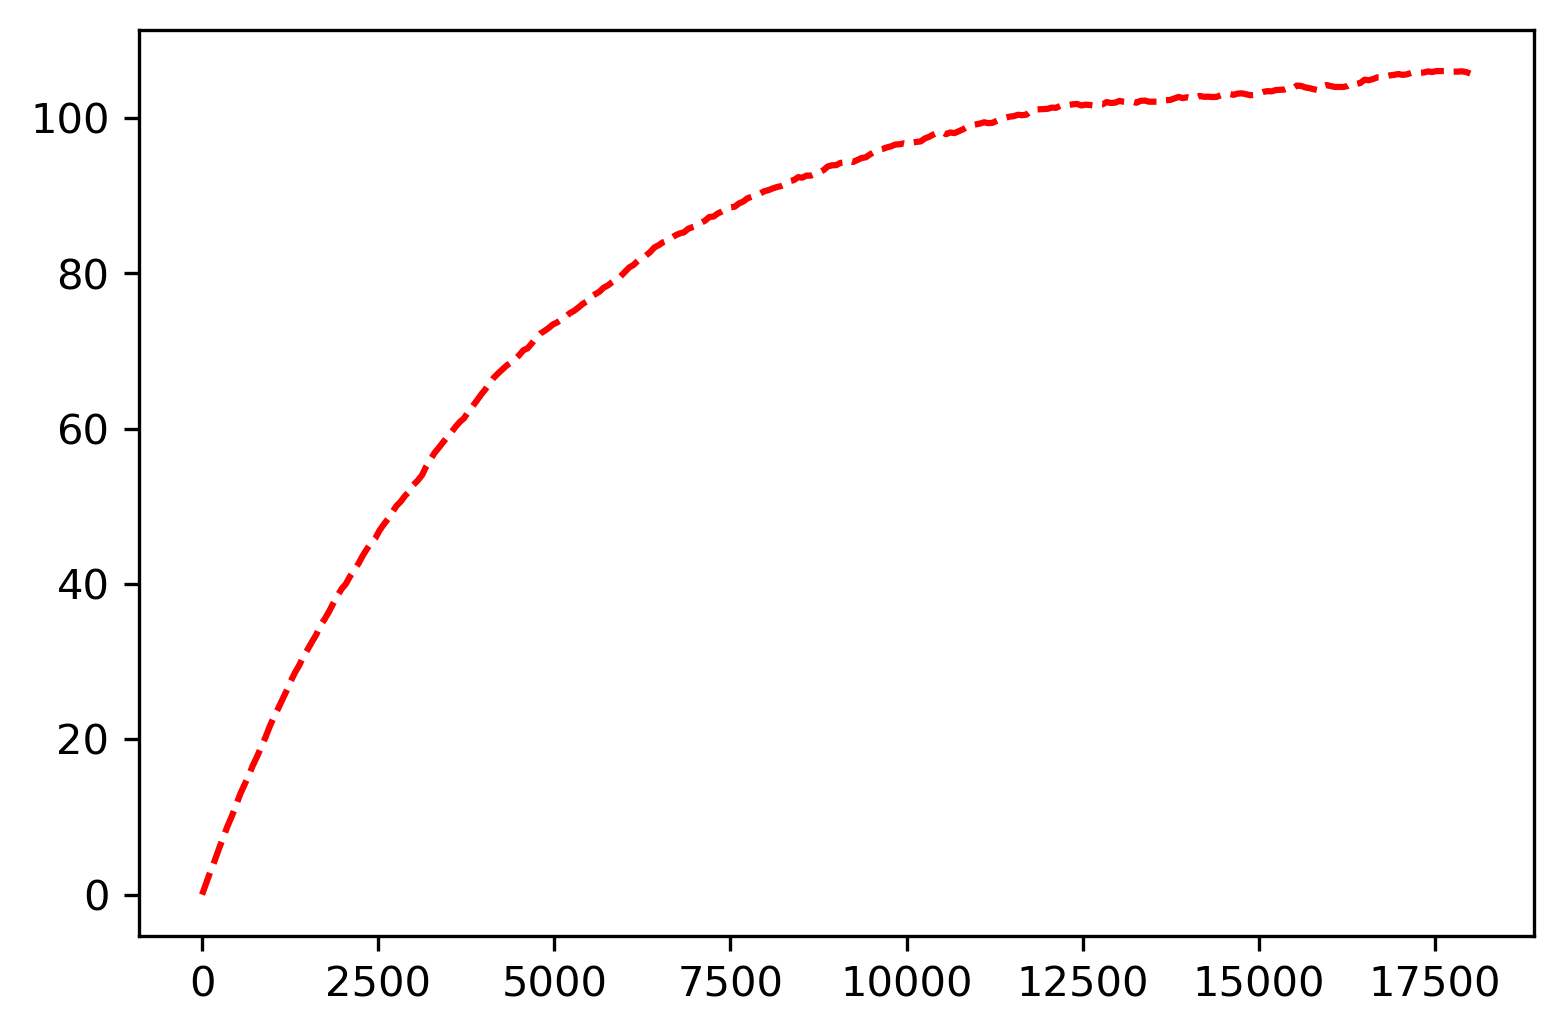

In [58]:
Population = CumalativePopulation/150
# for comparison
Time = Ts/150
Pop_Ls = Ls/150

plt.figure(dpi=300)

plt.plot(Minutes, Population, 'r--');


This appears to be a have a logarithmic relationship. Once the population gets to be about 100 it starts to plateau.